In [1]:
# Task1 Hint: (with sample code for the SIFT detector)
# Initialize SIFT detector, detect keypoints, store and show SIFT keypoints of original image in a Numpy array
# Define parameters for SIFT initializations such that we find only 10% of keypoints
import cv2
import matplotlib.pyplot as plt

class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.xfeatures2d.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector



# Task2 Hint:
# Upscale the image, compute SIFT features for rescaled image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches

# Task3 Hint: (with sampe code for the rotation)
# Rotate the image and compute SIFT features for rotated image
# Apply BFMatcher with defined params and ratio test to obtain good matches, and then select and draw best 5 matches
import math
import numpy as np
import sys

# image: image to rotate
# x:     x-coordinate of point we wish to rotate around
# y:     y-coordinate of point we wish to rotate around
# angle: degrees to rotate image by
#
# Returns a rotated copy of the original image
def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

# Get coordinates of center point.
#
# image:  Image that will be rotated
# return: (x, y) coordinates of point at center of image
def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2

    return center

In [2]:
# Function to set parameter qucikly
#
# parameter: defult parameter in lab2
# return: dic of parameters
def set_parameter(n_features=0,n_octave_layers=3,contrast_threshold=0.03,edge_threshold=10,sigma=1.6):
    params={}
    params["n_features"]=n_features
    params["n_octave_layers"]=n_octave_layers
    params["contrast_threshold"]=contrast_threshold
    params["edge_threshold"]=edge_threshold
    params["sigma"]=sigma
    return params

In [3]:
img_t = cv2.imread('./COMP9517_20T2_Lab2_Image.jpg')
img = cv2.cvtColor(img_t,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

6233


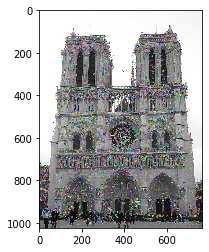

In [4]:
# TASK_1_A
# 1.READ THE IMAGE
# 2.CREATE SiftDetector AND GET THE DETECTOR
# 3.GET THE KEY POINT AND drawKeypoints
# 4.WRITE AND SHOW THE OUTPUT

sift_detector = SiftDetector()
sift = sift_detector.get_detector(None)
task1_a_kp = sift.detect(img,None)
print(len(task1_a_kp))
img_task1_a = np.zeros(img.shape, np.uint8)
cv2.drawKeypoints(img,task1_a_kp,img_task1_a)
cv2.imwrite('img_task1_a.jpg',img_task1_a)
plt.imshow(img_task1_a)

623


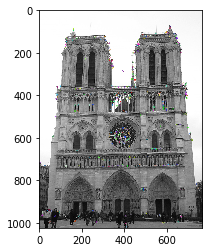

In [5]:
# TASK_1_B
#
# 1.Vary the parameter n_features as len(task_1_a_kp)*0.1, OTHER PARAMETER STILL THE SAME
# 2.THE OTHER STEP IS THE SAME AS TASK_1_A
sift_detector = SiftDetector()
sift = sift_detector.get_detector(set_parameter(n_features=int(len(task1_a_kp)*0.1)))
task_1_b_kp, task_1_b_dest = sift.detectAndCompute(img,None)
print(len(task_1_b_kp))                           
img_task1_b = np.zeros(img.shape, np.uint8)
cv2.drawKeypoints(img,task_1_b_kp,img_task1_b)
cv2.imwrite('img_task1_b.jpg',img_task1_b)
plt.imshow(img_task1_b)

1.1494140625 1.1497395833333333


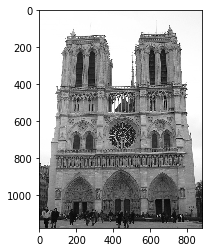

In [6]:
# TASK_2_A
#
# 1.Enlarge the image by cv2.resize with INTER_LINEAR way and check it


img_task2_a = cv2.resize(img,(int(img.shape[1]*1.15),int(img.shape[0]*1.15)), interpolation=cv2.INTER_CUBIC)
print(img_task2_a.shape[0]/img.shape[0],img_task2_a.shape[1]/img.shape[1])
plt.imshow(img_task2_a)


True

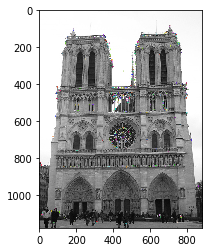

In [7]:
# TASK_2_B
#
# 1.Take the same steps in task_1_b
sift_detector = SiftDetector()
sift = sift_detector.get_detector(set_parameter(n_features=int(len(task1_a_kp)*0.1)))
taks_2_b_kp, task_2_b_dest = sift.detectAndCompute(img_task2_a,None)
img_task2_b = np.zeros(img_task2_a.shape, np.uint8)
img_task2_b = cv2.drawKeypoints(img_task2_a,taks_2_b_kp,img_task2_b)
plt.imshow(img_task2_b)
cv2.imwrite('img_task2_b.jpg',img_task2_b)

In [8]:
# TASK_2_C
#
# The keypoints of the scaled image roughly the same as those of the 
# original image, this means that the scale of image will not affect
# the keypoint extract in a suitable range of scale. So, SIFT has scale 
# invariance.

True

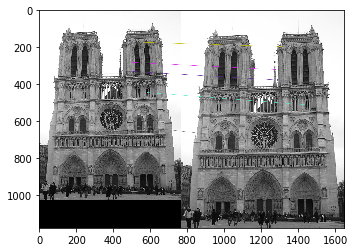

In [9]:
# TASK_2_D
#
# 1.Create a mathcer
# 2.Match key points
# 3.Draw the pic with 5 best-matching keypoints
bf = cv2.BFMatcher()
matched = bf.knnMatch(task_1_b_dest,task_2_b_dest,k=2)
ratio = 0.75
best_matched = []
for i,(j,k) in enumerate(matched):
    if j.distance < ratio*k.distance:
        best_matched.append(j)
best_matched = sorted(best_matched, key = lambda x:x.distance)
img_task2_d = cv2.drawMatches(img,task_1_b_kp,img_task2_a,taks_2_b_kp,best_matched[:5],None, flags=2)
plt.imshow(img_task2_d)
cv2.imwrite('img_task2_d.jpg',img_task2_d)

True

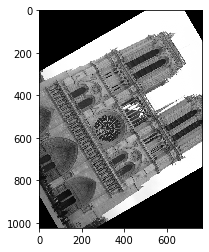

In [10]:
#TASK_3_A
#
# Rotate the picture
center = get_img_center(img)
img_taks3_a = rotate(img, center[1], center[0], -60)
plt.imshow(img_taks3_a)
cv2.imwrite('img_taks3_a.jpg',img_taks3_a)

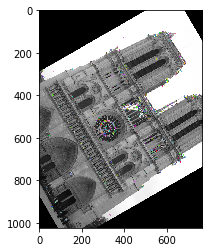

In [11]:
#TASK_3_B
#
# The same as task1_b
sift_detector = SiftDetector()
sift = sift_detector.get_detector(set_parameter(n_features=int(len(task1_a_kp)*0.1)))
task_3_b_kp, task_3_b_dest = sift.detectAndCompute(img_taks3_a,None)                         
img_task3_b = np.zeros(img.shape, np.uint8)
cv2.drawKeypoints(img_taks3_a,task_3_b_kp,img_task3_b)
cv2.imwrite('img_task3_b.jpg',img_task3_b)
plt.imshow(img_task3_b)

In [12]:
# TASK_3_C
#
# The keypoints of the rotated image roughly the same as those of the 
# original image, this means that the rotation of image will not affect
# the keypoint extract. So, SIFT has rotation invariance.

True

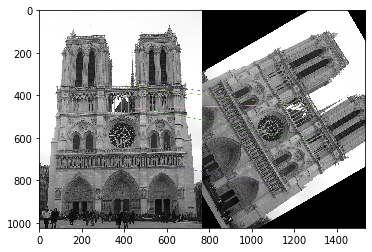

In [13]:
# TASK_3_D
#
# 1.The same as task2_d
bf = cv2.BFMatcher()
matched = bf.knnMatch(task_1_b_dest,task_3_b_dest,k=2)
ratio = 0.75
best_matched = []
for i,(j,k) in enumerate(matched):
    if j.distance < ratio*k.distance:
        best_matched.append(j)
    
best_matched = sorted(best_matched, key = lambda x:x.distance)
sorted_best_matched = []
for m in best_matched:
    sorted_best_matched.append([m])    

img_task3_d = cv2.drawMatchesKnn(img,task_1_b_kp,img_taks3_a,task_3_b_kp,sorted_best_matched[:5],None, flags=2)
plt.imshow(img_task3_d)
cv2.imwrite('img_task3_d.jpg',img_task3_d)